In [78]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
#Loading in data for big cities and mid-range cities

df = pd.read_csv('yelp_scores.csv')
df_small = pd.read_csv('yelp_scores_small.csv')

# Preprocessing

In [80]:
#Adjusting column names

df = df.rename(columns={"city": "City", "reviews": "Score"})
df_small = df_small.rename(columns={"city": "City", "reviews": "Score"})

In [81]:
#Reformatting strings into numerical data

a=[]
b=[]

for i in range(0,len(df['Score'])):
    a.append(df['Score'][i].split(" "))
for j in range(0,len(a)):
    b.append(float((a[j][0])))
df['Score'] = b

c=[]
d=[]

for i in range(0,len(df_small['Score'])):
    c.append(df_small['Score'][i].split(" "))
for j in range(0,len(c)):
    d.append(float((c[j][0])))
df_small['Score'] = d

In [82]:
#Fixing the way city names are displayed

new_list = []
for i in range(0,len(df['City'])):
    new_list.append(" ".join(re.split('[\s,.-]+', df['City'][i][3:])[:-1]))
new_list
df['City'] = new_list

new_list_small = []
for i in range(0,len(df_small['City'])):
    new_list_small.append(" ".join(re.split('[\s,.-]+', df_small['City'][i][3:])[:-1]))
df_small['City'] = new_list_small

In [83]:
#Clustering cities into regions

midwest = ['Columbus', 'Chicago', 'Milwaukee', 'Detroit', 'Indianapolis']
west = ['Phoenix', 'San Francisco', 'San Jose', 'San Diego', 'Los Angeles']
east = ['Philadelphia', 'Baltimore', 'Boston', 'Washington', 'New York']
south = ['Houston', 'Nashville', 'San Antonio', 'Austin', 'Dallas']

reg = []
for i in range(0,len(df)):
    if df.City[i] in midwest:
        reg.append('Midwest')
    if df.City[i] in west:
        reg.append('West')
    if df.City[i] in east:
        reg.append('East')
    if df.City[i] in south:
        reg.append('South')
df['Region']=reg

#----------------------------------------------------------------------------------#

midwest_small = ['Des Moines', 'Akron', 'Aurora', 'Grand Rapids', 'Lincoln']
west_small = ['Boise', 'Salem', 'Salt Lake City', 'San Bernardino', 'Tacoma']
east_small = ['Buffalo', 'Newark', 'Providence', 'Rochester', 'Worcester']
south_small = ['Richmond', 'Tallahassee', 'Little Rock', 'Birmingham', 'Baton Rouge']

reg_small = []
for i in range(0,len(df_small)):
    if df_small.City[i] in midwest_small:
        reg_small.append('Midwest')
    if df_small.City[i] in west_small:
        reg_small.append('West')
    if df_small.City[i] in east_small:
        reg_small.append('East')
    if df_small.City[i] in south_small:
        reg_small.append('South')
df_small['Region']=reg_small

df_small['Big City']='No'
df['Big City']='Yes'
df_comb = df.append(df_small)

# 1. Top 5 cities

Text(0.5, 1.0, 'Distribution of Restaurant Review Scores on Yelp, Top 5 Most Populated US Cities, Top 120 Most Reviewed Restaurants per City')

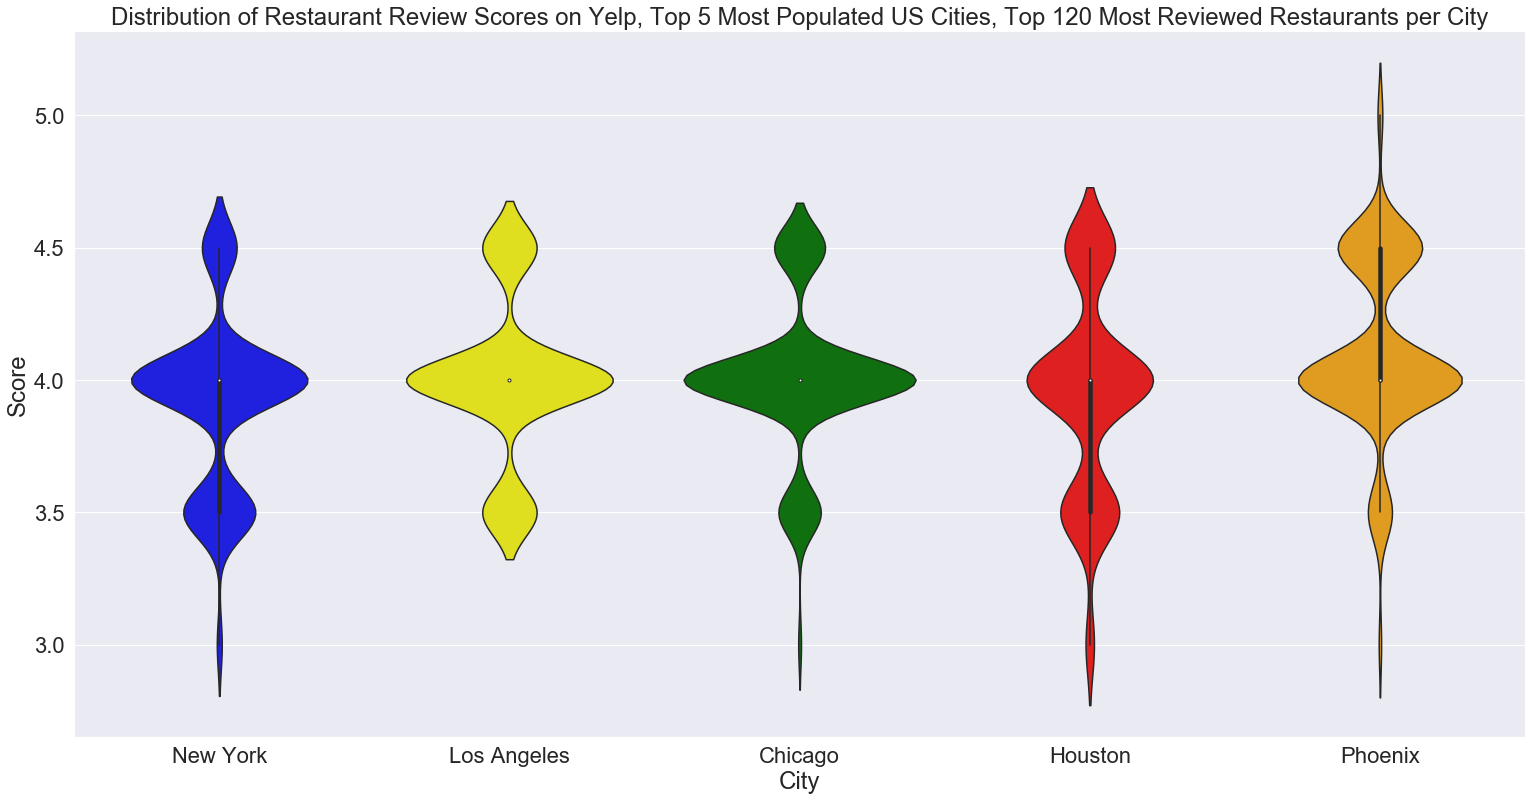

In [125]:
#Slide 6 -- Graph

col=['blue', 'yellow', 'green', 'red', 'orange']
order=['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']

means = df.groupby('City').mean()
means.sort_values(by=['Score'])
plt.figure(figsize=(26,13))
sns.set(font_scale=2)
sns.violinplot(title='hi', x="City", y="Score", data=dftop5, bw=.3, palette=col, order=order).set_title('Distribution of Restaurant Review Scores on Yelp, Top 5 Most Populated US Cities, Top 120 Most Reviewed Restaurants per City')

In [85]:
#Slide 6 -- Table

dftop5 = df.loc[df.City.isin(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'])]
a = dftop5.groupby('City').mean()
a['σ of Scores'] = dftop5.groupby('City').std()
a = a.rename(columns={"Score": "x̄ of Scores"})
a.sort_values(by=['x̄ of Scores'])

,x̄ of Scores,σ of Scores
City,,
New York,3.918103,0.322652
Houston,3.948276,0.380956
Los Angeles,4.000000,0.294884
Chicago,4.004310,0.283577
Phoenix,4.116379,0.332041


Text(0.5, 1.0, 'Count of Restaurant Review Scores on Yelp, Top 5 Most Populated US Cities, Top 120 Most Reviewed Restaurants per City')

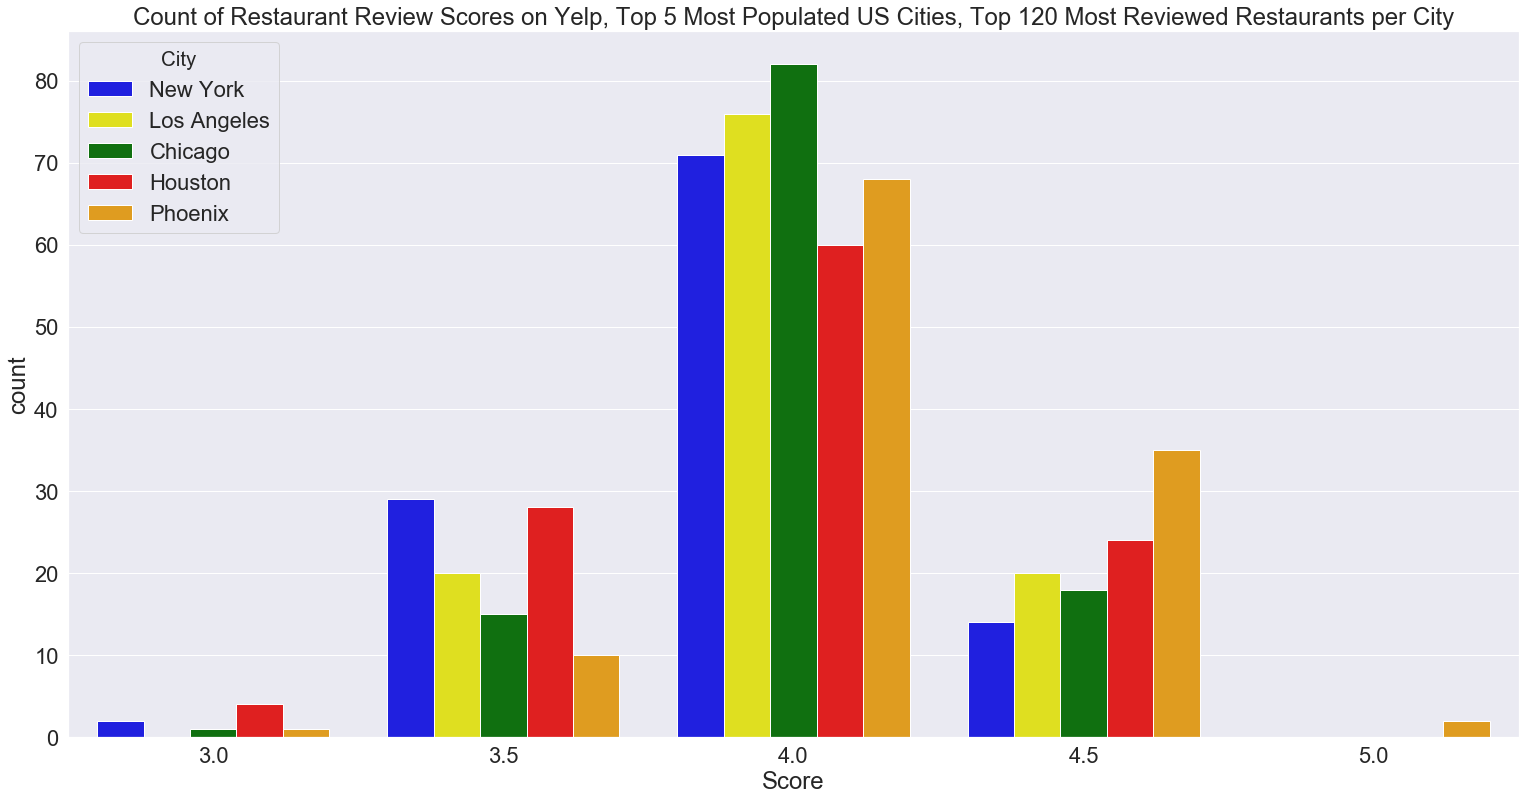

In [126]:
#Slide 7 -- Graph

plt.figure(figsize=(26,13))
sns.countplot(x="Score", hue="City", data=dftop5, palette=col, hue_order=order).set_title('Count of Restaurant Review Scores on Yelp, Top 5 Most Populated US Cities, Top 120 Most Reviewed Restaurants per City')

In [87]:
#Slide 7 -- Statistic cited regarding percent of reviews that are a 4.0

len(dftop5[dftop5['Score']==4])/len(dftop5)

0.6155172413793103

In [88]:
#Slide 7 -- Table

tab = (dftop5[dftop5['Score']>=4.5].groupby('City').count())/(dftop5.groupby('City').count())
tab['Score'] = pd.Series([round(val, 4) for val in tab['Score']], index = tab.index)
tab['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab['Score']], index = tab.index)
tab = tab.rename(columns={'Score': "4.5 Stars or Greater"})
tab.sort_values(by=['4.5 Stars or Greater'])

,4.5 Stars or Greater,Region,Big City
City,,,
New York,12.07%,0.120690,0.120690
Chicago,15.52%,0.155172,0.155172
Los Angeles,17.24%,0.172414,0.172414
Houston,20.69%,0.206897,0.206897
Phoenix,31.90%,0.318966,0.318966


# 2. Clustering cities into regions

Text(0.5, 1.0, 'Distribution of Restaurant Review Scores on Yelp, Regional, City Populations of 500,000+')

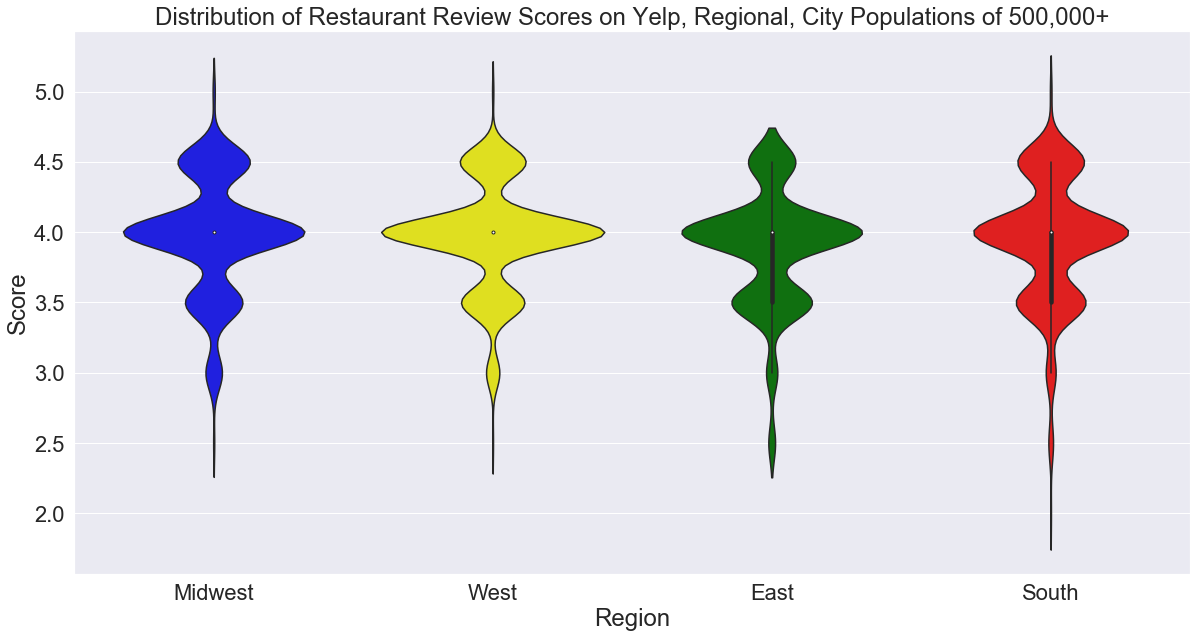

In [127]:
#Slide 9 -- Graph

plt.figure(figsize=(20,10))
sns.violinplot(x="Region", y="Score", data=df, bw=.3, palette=col).set_title('Distribution of Restaurant Review Scores on Yelp, Regional, City Populations of 500,000+')

In [90]:
#Slide 9 -- Table

a = df.groupby('Region').mean()
a['σ of Scores'] = df.groupby('Region').std()
a = a.rename(columns={"Score": "x̄ of Scores"})
a.sort_values(by=['x̄ of Scores'])

,x̄ of Scores,σ of Scores
Region,,
East,3.883621,0.406965
South,3.941723,0.430911
West,3.968103,0.361488
Midwest,3.974277,0.401464


Text(0.5, 1.0, 'Count of Restaurant Review Scores on Yelp, Top 5 Most Populated US Cities, Top 120 Most Reviewed Restaurants per City')

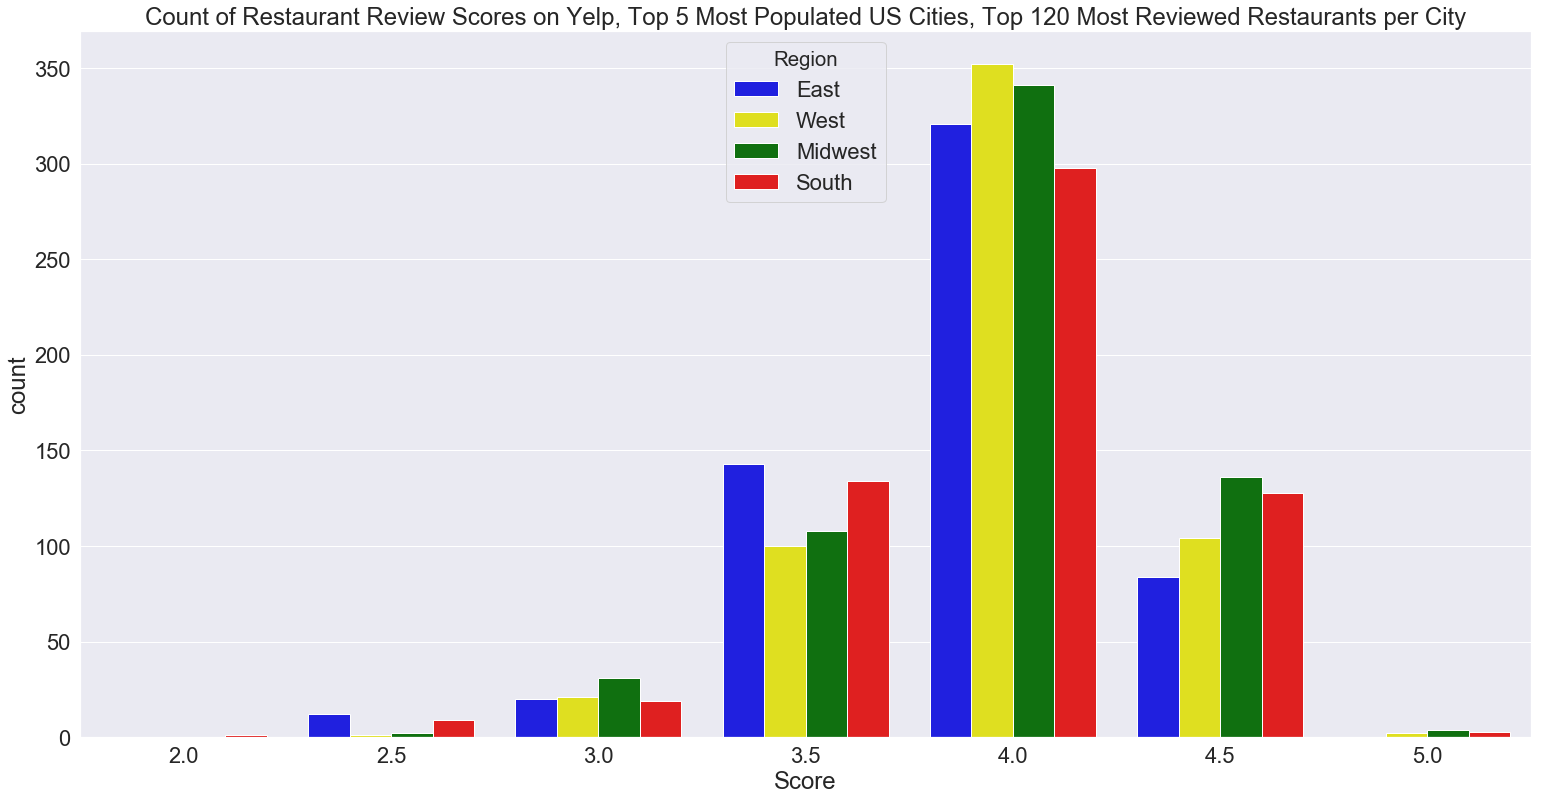

In [128]:
#Slide 10-12 -- Graph

df.groupby('Region').mean()
plt.figure(figsize=(26,13))
sns.set(font_scale=2)
sns.countplot(x="Score", hue="Region", data=df, hue_order=['East', 'West', 'Midwest', 'South'], palette=['blue', 'yellow', 'green', 'red']).set_title('Count of Restaurant Review Scores on Yelp, Top 5 Most Populated US Cities, Top 120 Most Reviewed Restaurants per City')

In [92]:
#Slide 10 -- Table

x=[]
for i in range(0,len(tab)):
    if tab.index[i] in midwest:
        x.append('Midwest')
    if tab.index[i] in west:
        x.append('West')
    if tab.index[i] in east:
        x.append('East')
    if tab.index[i] in south:
        x.append('South')
tab['Region']=x
tab = (df[df['Score']>=4.5].groupby('Region').count())/(df.groupby('Region').count())
tab['Score'] = pd.Series([round(val, 4) for val in tab['Score']], index = tab.index)
tab['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab['Score']], index = tab.index)
tab = tab.rename(columns={'Score': "4.5 Stars or Greater"})
tab = tab.drop(columns=['City'])
tab.sort_values(by=['Big City'])

,4.5 Stars or Greater,Big City
Region,,
East,14.48%,0.144828
West,18.28%,0.182759
South,22.13%,0.221284
Midwest,22.51%,0.225080


In [93]:
#Slide 10 -- Two Proportion Z-Test

import numpy as np
from statsmodels.stats.proportion import proportions_ztest

east = df[df['Region']=='East']
noteast = df[df['Region']!='East']


count = np.array([len(east[east['Score']==4.5]), len(noteast[noteast['Score']==4.5])])
nobs = np.array([len(east), len(noteast)])
stat, pval = proportions_ztest(count, nobs)
print(stat)
print(pval)

-3.215447581743985
0.001302412784637246


In [94]:
#Slide 11 -- Table

taball = (df[df['Score']>=4.5].groupby('City').count())/(df.groupby('City').count())
taball['Score'] = pd.Series([round(val, 4) for val in taball['Score']], index = taball.index)
taball['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in taball['Score']], index = taball.index)
taball = taball.rename(columns={'Score': "4.5 Stars or Greater"})
taball.sort_values(by=['Region'])

,4.5 Stars or Greater,Region,Big City
City,,,
San Jose,6.03%,0.060345,0.060345
Boston,10.34%,0.103448,0.103448
San Francisco,11.21%,0.112069,0.112069
New York,12.07%,0.120690,0.120690
Washington,12.93%,0.129310,0.129310
Detroit,14.06%,0.140625,0.140625
Chicago,15.52%,0.155172,0.155172
Los Angeles,17.24%,0.172414,0.172414
Baltimore,17.24%,0.172414,0.172414


In [95]:
#Slide 12 -- Table

lowtab = (df[df['Score']<=2.5].groupby('Region').count())/(df.groupby('Region').count())
lowtab['Score'] = pd.Series([round(val, 4) for val in lowtab['Score']], index = lowtab.index)
lowtab['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in lowtab['Score']], index = lowtab.index)
lowtab = lowtab.rename(columns={'Score': "2.5 Stars or Less"})
lowtab = lowtab.drop(columns='City')
lowtab.sort_values(by=['Big City'])

,2.5 Stars or Less,Big City
Region,,
West,0.17%,0.001724
Midwest,0.32%,0.003215
South,1.69%,0.016892
East,2.07%,0.020690


In [96]:
#Slide 12 -- Table

lowcitytab = (df[df['Score']<=2.5].groupby('City').count())
x=[]
for i in range(0,len(tab)):
    if lowcitytab.index[i] in midwest:
        x.append('Midwest')
    if lowcitytab.index[i] in west:
        x.append('West')
    if lowcitytab.index[i] in east:
        x.append('East')
    if lowcitytab.index[i] in south:
        x.append('South')
        
lowcitytab = lowcitytab.rename(columns={'Score': "2.5 Stars or Less"})
lowcitytab.sort_values(by=['Big City'], ascending=True)

,2.5 Stars or Less,Region,Big City
City,,,
Austin,1,1,1
Boston,1,1,1
Dallas,1,1,1
Indianapolis,1,1,1
Milwaukee,1,1,1
San Jose,1,1,1
Philadelphia,2,2,2
San Antonio,8,8,8
Baltimore,9,9,9


# 3. Determining the effect of city population on scores

Text(0.5, 1.0, 'Distribution of Restaurant Review Scores on Yelp, Population 500,000+ vs. Population 100,000 - 300,000')

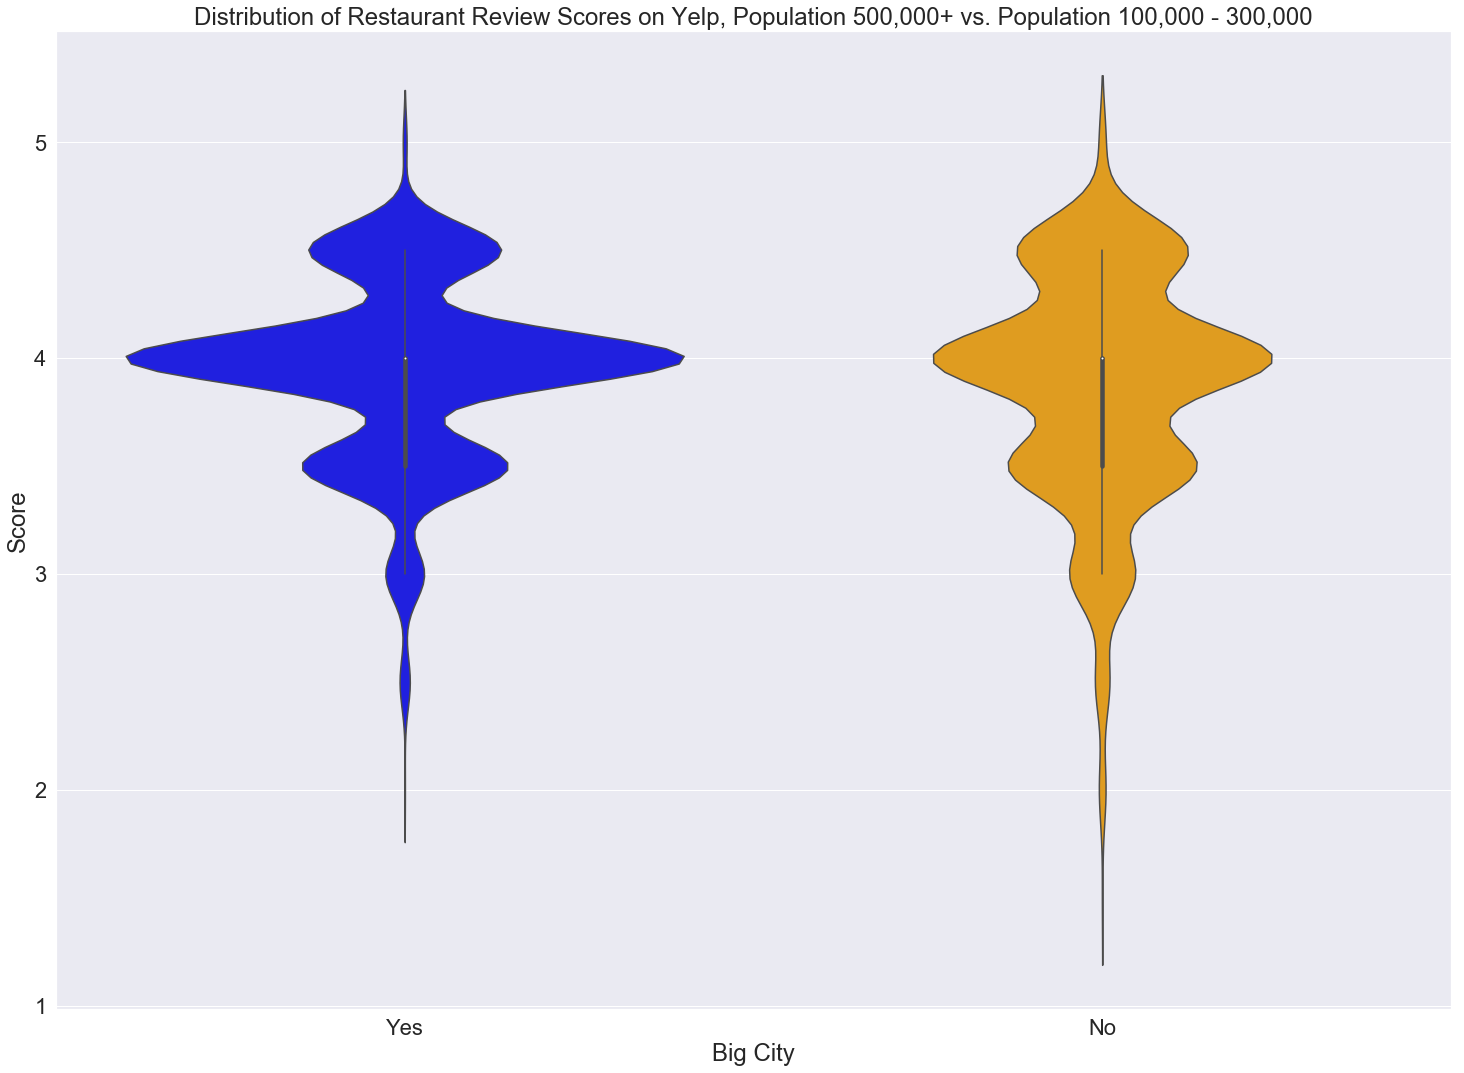

In [132]:
#Slide 15 -- Graph

plt.figure(figsize=(25,18))
sns.set(font_scale=2)
sns.violinplot(x="Big City", y="Score", data=df_comb, bw=.3, palette=['blue', 'orange']).set_title('Distribution of Restaurant Review Scores on Yelp, Population 500,000+ vs. Population 100,000 - 300,000')

In [98]:
#Slide 15-16 -- Table

df_comb.groupby('Big City').mean()

a = df_comb.groupby('Big City').mean()
a['σ of Scores'] = df_comb.groupby('Big City').std()
a = a.rename(columns={"Score": "x̄ of Scores"})
a.sort_values(by=['x̄ of Scores'])

,x̄ of Scores,σ of Scores
Big City,,
No,3.868866,0.516235
Yes,3.942502,0.402479


In [99]:
#Slide 16 -- Table

df_small.groupby('City').mean()
a = df_small.groupby('City').mean()
# a['σ of Scores'] = df_small.groupby('City').std()
a = a.rename(columns={"Score": "x̄ of Scores"})
a.sort_values(by=['x̄ of Scores'])

,x̄ of Scores
City,
Newark,3.637931
Aurora,3.671875
Lincoln,3.696850
Tacoma,3.797414
Worcester,3.804688
San Bernardino,3.814050
Salem,3.821429
Buffalo,3.848361
Baton Rouge,3.864754


In [100]:
#Slide 16 -- Table

df.groupby('City').mean()
a = df.groupby('City').mean()
# a['σ of Scores'] = df_small.groupby('City').std()
a = a.rename(columns={"Score": "x̄ of Scores"})
a.sort_values(by=['x̄ of Scores'])

,x̄ of Scores
City,
San Jose,3.724138
Baltimore,3.780172
San Antonio,3.840517
Detroit,3.847656
Boston,3.875000
Washington,3.879310
New York,3.918103
Austin,3.922414
San Francisco,3.931034


In [101]:
#Slide 17 -- Table

a = df_small.groupby('City').std()
# a['σ of Scores'] = df_small.groupby('City').std()
a = a.rename(columns={"Score": "σ of Scores"})
a.sort_values(by=['σ of Scores'])

,σ of Scores
City,
Salt Lake City,0.390521
Richmond,0.405577
Des Moines,0.417664
Grand Rapids,0.433510
Rochester,0.447114
Buffalo,0.449469
Providence,0.467881
Boise,0.475533
Baton Rouge,0.481204


In [102]:
#Slide 17 -- Table

a = df.groupby('City').std()
a = a.rename(columns={"Score": "σ of Scores"})
a.sort_values(by=['σ of Scores'])

,σ of Scores
City,
Chicago,0.283577
Los Angeles,0.294884
San Diego,0.301421
San Francisco,0.315516
New York,0.322652
Phoenix,0.332041
Boston,0.360404
Dallas,0.360742
Washington,0.364875


Text(0.5, 1.0, 'Count of Restaurant Review Scores on Yelp, Population 500,000+ vs. Population 100,000 - 300,000')

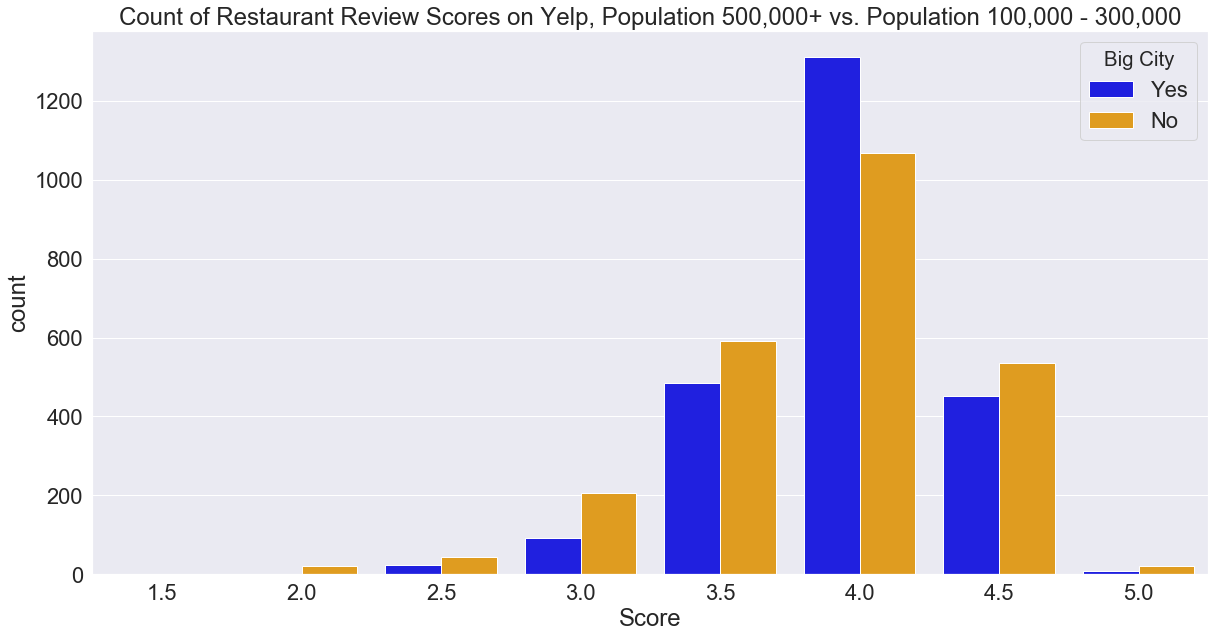

In [135]:
#Slide 18 -- Graph

plt.figure(figsize=(20,10))
sns.set(font_scale=2)
sns.countplot(x="Score", hue="Big City", data=df_comb, palette=['blue', 'orange']).set_title('Count of Restaurant Review Scores on Yelp, Population 500,000+ vs. Population 100,000 - 300,000')

In [104]:
#Slide 18 -- Table

tab1 = (df_comb[df_comb['Score']<=3.5].groupby('Big City').count())/(df_comb.groupby('Big City').count())
tab1['Score'] = pd.Series([round(val, 4) for val in tab1['Score']], index = tab1.index)
tab1['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab1['Score']], index = tab1.index)
tab1 = tab1.rename(columns={'Score': "3.5 Stars or Less"})

tab2 = (df_comb[df_comb['Score']==4].groupby('Big City').count())/(df_comb.groupby('Big City').count())
tab2['Score'] = pd.Series([round(val, 4) for val in tab2['Score']], index = tab2.index)
tab2['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab2['Score']], index = tab2.index)
tab2 = tab2.rename(columns={'Score': "4.0 Stars Exactly"})

tab3 = (df_comb[df_comb['Score']>=4.5].groupby('Big City').count())/(df_comb.groupby('Big City').count())
tab3['Score'] = pd.Series([round(val, 4) for val in tab3['Score']], index = tab3.index)
tab3['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab3['Score']], index = tab3.index)
tab3 = tab3.rename(columns={'Score': "4.5 Stars or Greater"})

tab1['4.0 Stars Exactly'] = tab2['4.0 Stars Exactly']
tab1['4.5 Stars or Greater'] = tab3['4.5 Stars or Greater']
tab1.drop(columns=['City', 'Region'])

,3.5 Stars or Less,4.0 Stars Exactly,4.5 Stars or Greater
Big City,,,
No,34.71%,42.92%,22.37%
Yes,25.32%,55.27%,19.42%


In [105]:
#Slide 18 -- Chi Squared Test

chitablow = (df_comb[df_comb['Score']<=3.5].groupby('Big City')).count()
chitabmid = (df_comb[df_comb['Score']==4].groupby('Big City')).count()
chitabhigh = (df_comb[df_comb['Score']<=4.5].groupby('Big City')).count()
chitablow.loc['No']['Score']

from scipy.stats import chi2_contingency
obs = np.array([[chitablow.loc['No']['Score'], chitabmid.loc['No']['Score'], chitabhigh.loc['No']['Score']], 
                [chitablow.loc['Yes']['Score'], chitablow.loc['Yes']['Score'], chitablow.loc['Yes']['Score']]])
chi2_contingency(obs)

(274.3136313099494,
 2.713637334108345e-60,
 2,
 array([[1038.12197483, 1182.77831559, 2174.09970958],
        [ 425.87802517,  485.22168441,  891.90029042]]))

Text(0.5, 1.0, 'Count of Restaurant Review Scores on Yelp, Population 500,000+ vs. Population 100,000 - 300,000: EAST Region')

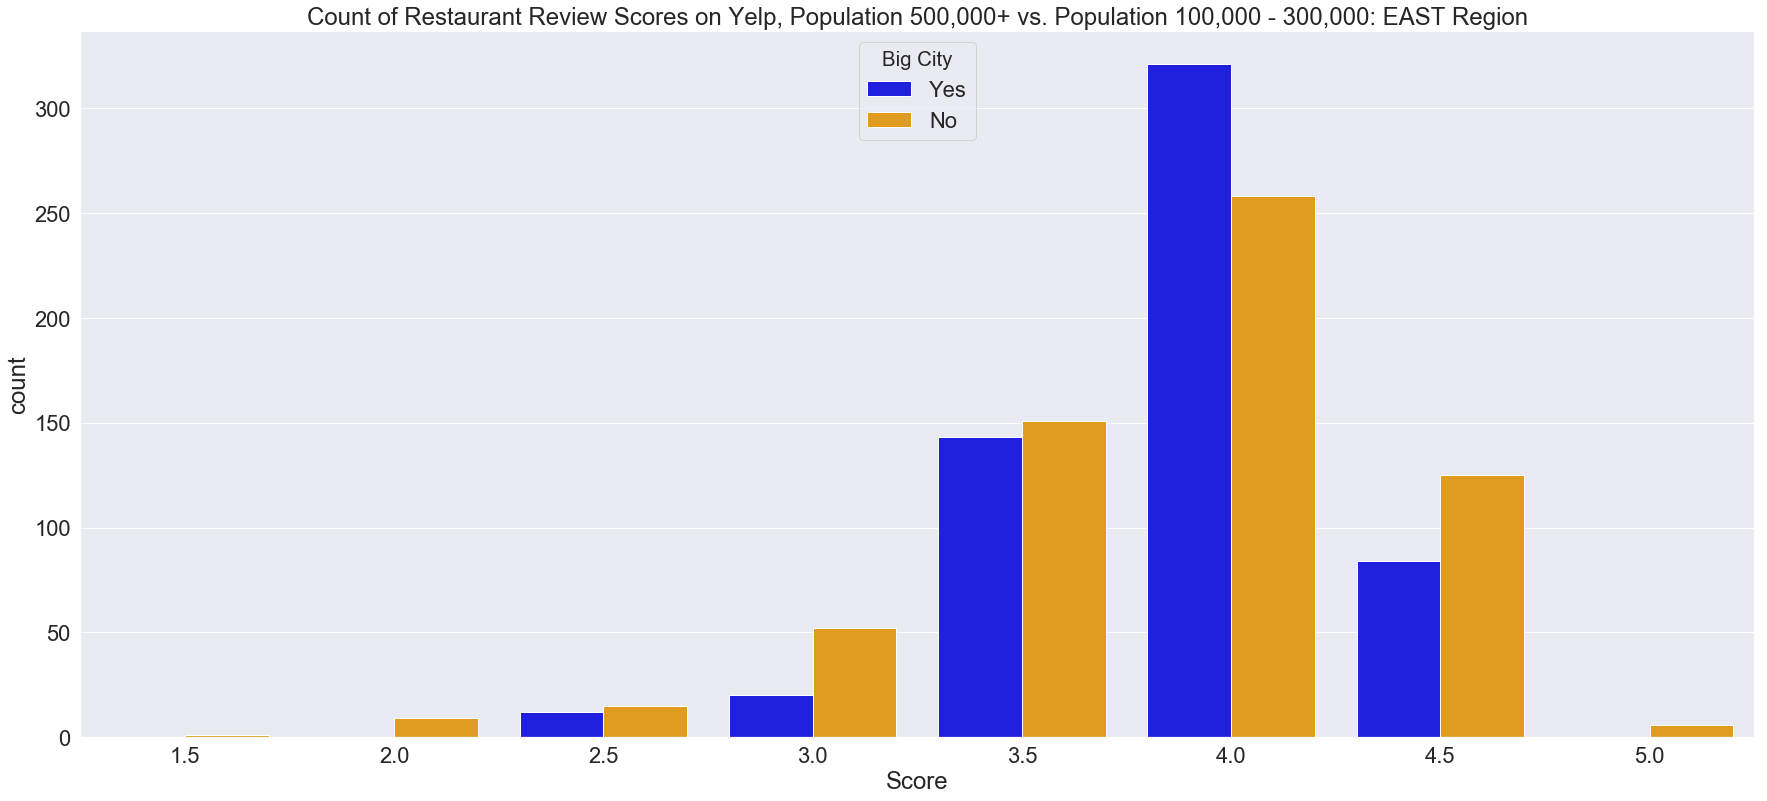

In [143]:
#Slide 19 -- East Graph

plt.figure(figsize=(30,13))
sns.set(font_scale=2)
sns.countplot(x="Score", hue="Big City", data=df_comb[df_comb['Region']=='East'], palette=['blue', 'orange']).set_title('Count of Restaurant Review Scores on Yelp, Population 500,000+ vs. Population 100,000 - 300,000: EAST Region')

Text(0.5, 1.0, 'Count of Restaurant Review Scores on Yelp, Population 500,000+ vs. Population 100,000 - 300,000: WEST Region')

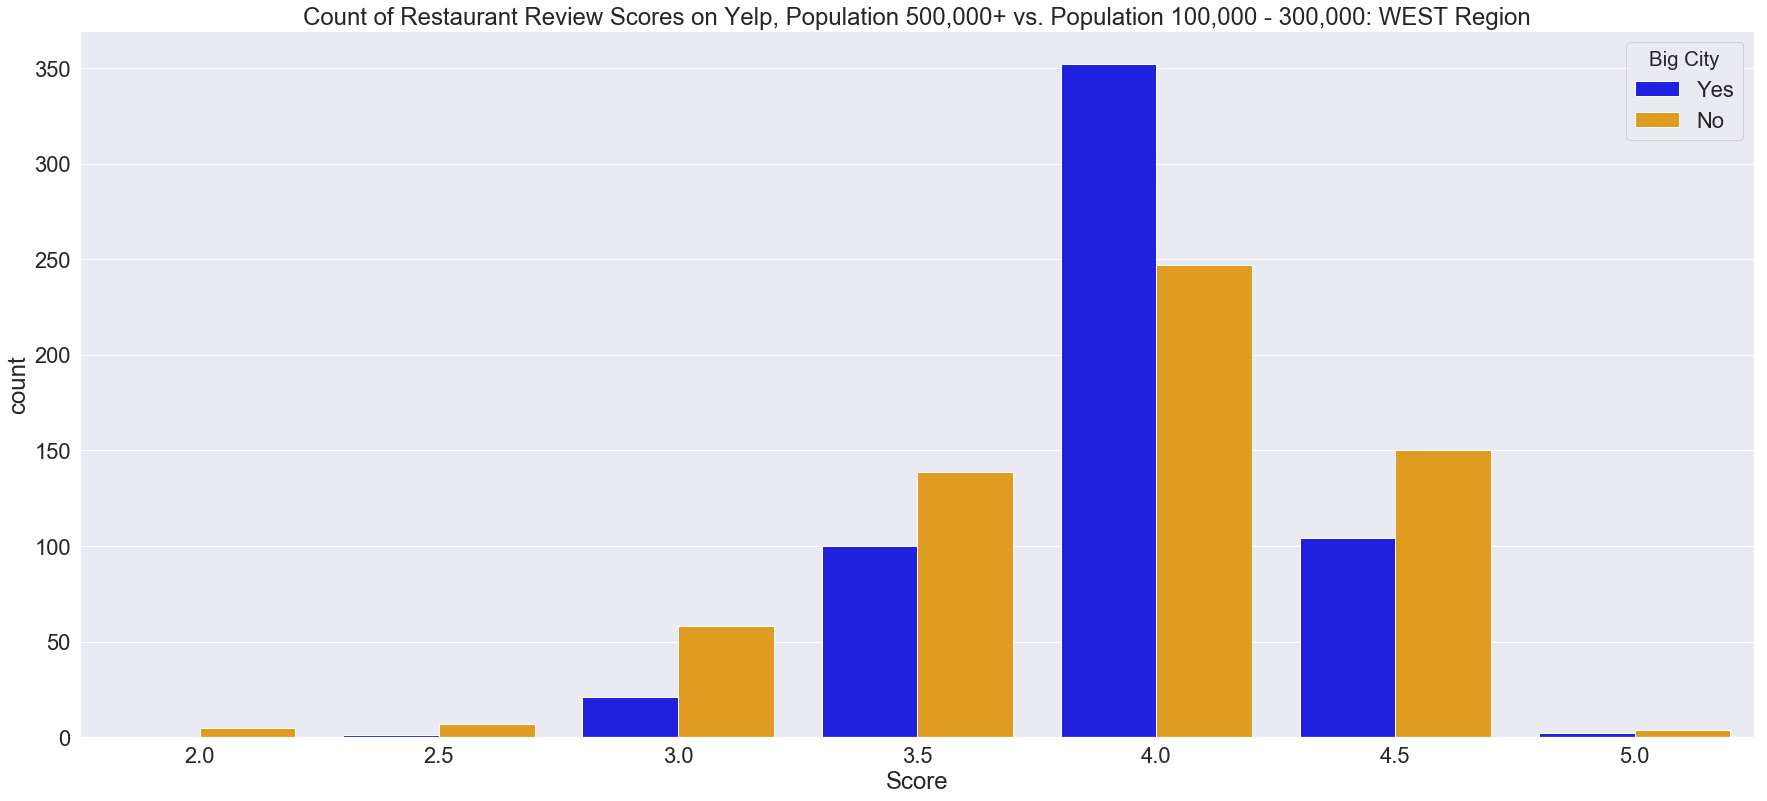

In [144]:
#Slide 19 -- West Graph

plt.figure(figsize=(30,13))
sns.set(font_scale=2)
sns.countplot(x="Score", hue="Big City", data=df_comb[df_comb['Region']=='West'], palette=['blue', 'orange']).set_title('Count of Restaurant Review Scores on Yelp, Population 500,000+ vs. Population 100,000 - 300,000: WEST Region')

Text(0.5, 1.0, 'Count of Restaurant Review Scores on Yelp, Population 500,000+ vs. Population 100,000 - 300,000: MIDWEST Region')

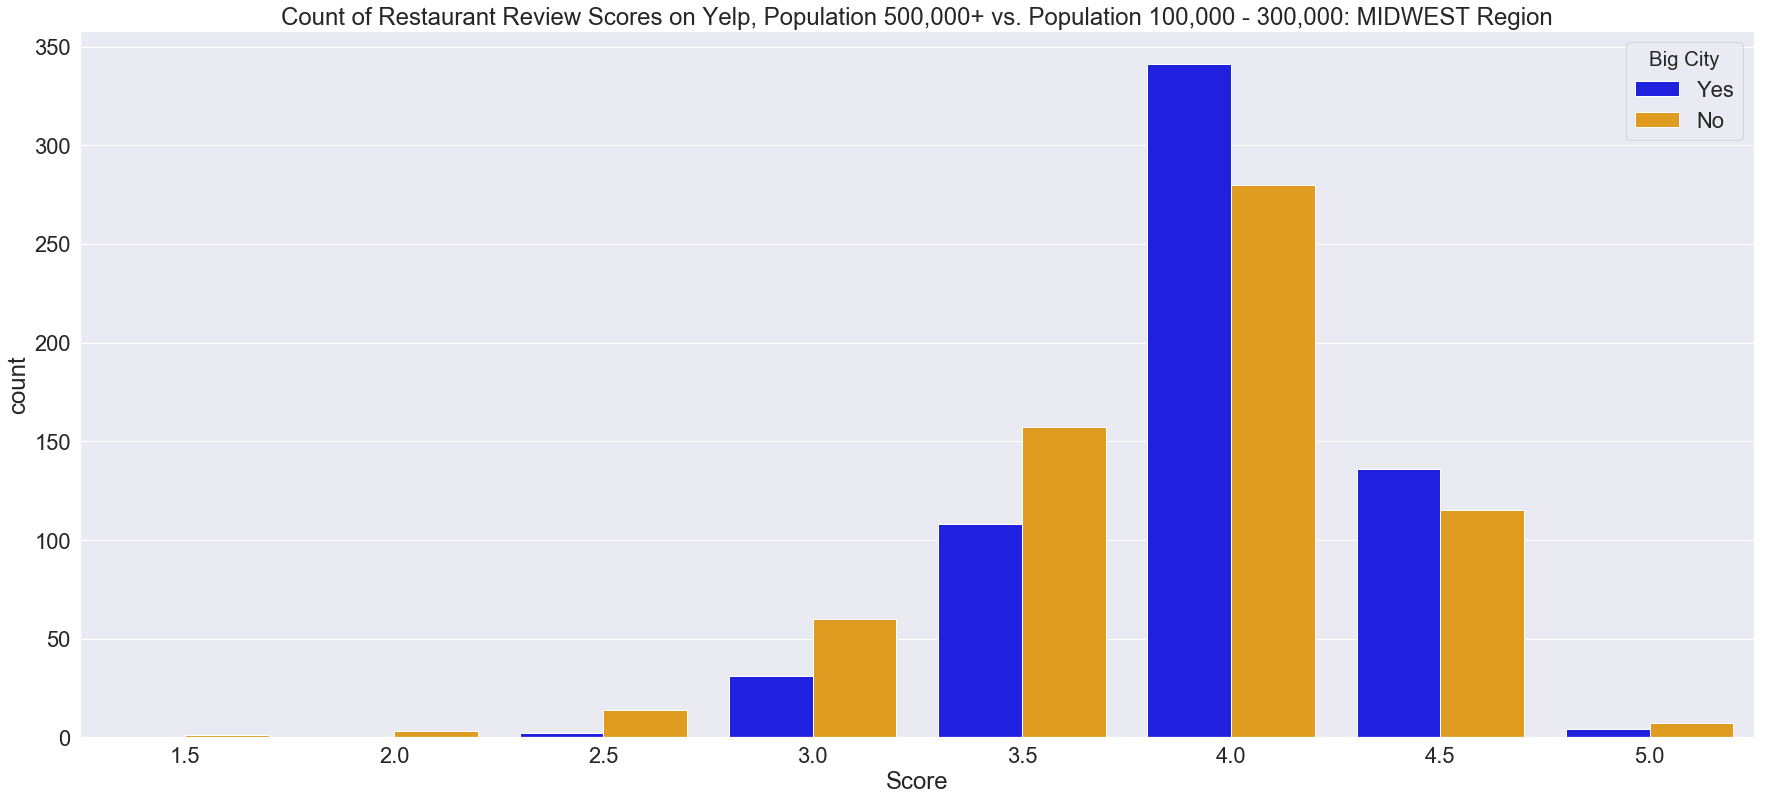

In [145]:
#Slide 19 -- Midwest Graph

plt.figure(figsize=(30,13))
sns.set(font_scale=2)
sns.countplot(x="Score", hue="Big City", data=df_comb[df_comb['Region']=='Midwest'], palette=['blue', 'orange']).set_title('Count of Restaurant Review Scores on Yelp, Population 500,000+ vs. Population 100,000 - 300,000: MIDWEST Region')

Text(0.5, 1.0, 'Count of Restaurant Review Scores on Yelp, Population 500,000+ vs. Population 100,000 - 300,000: SOUTH Region')

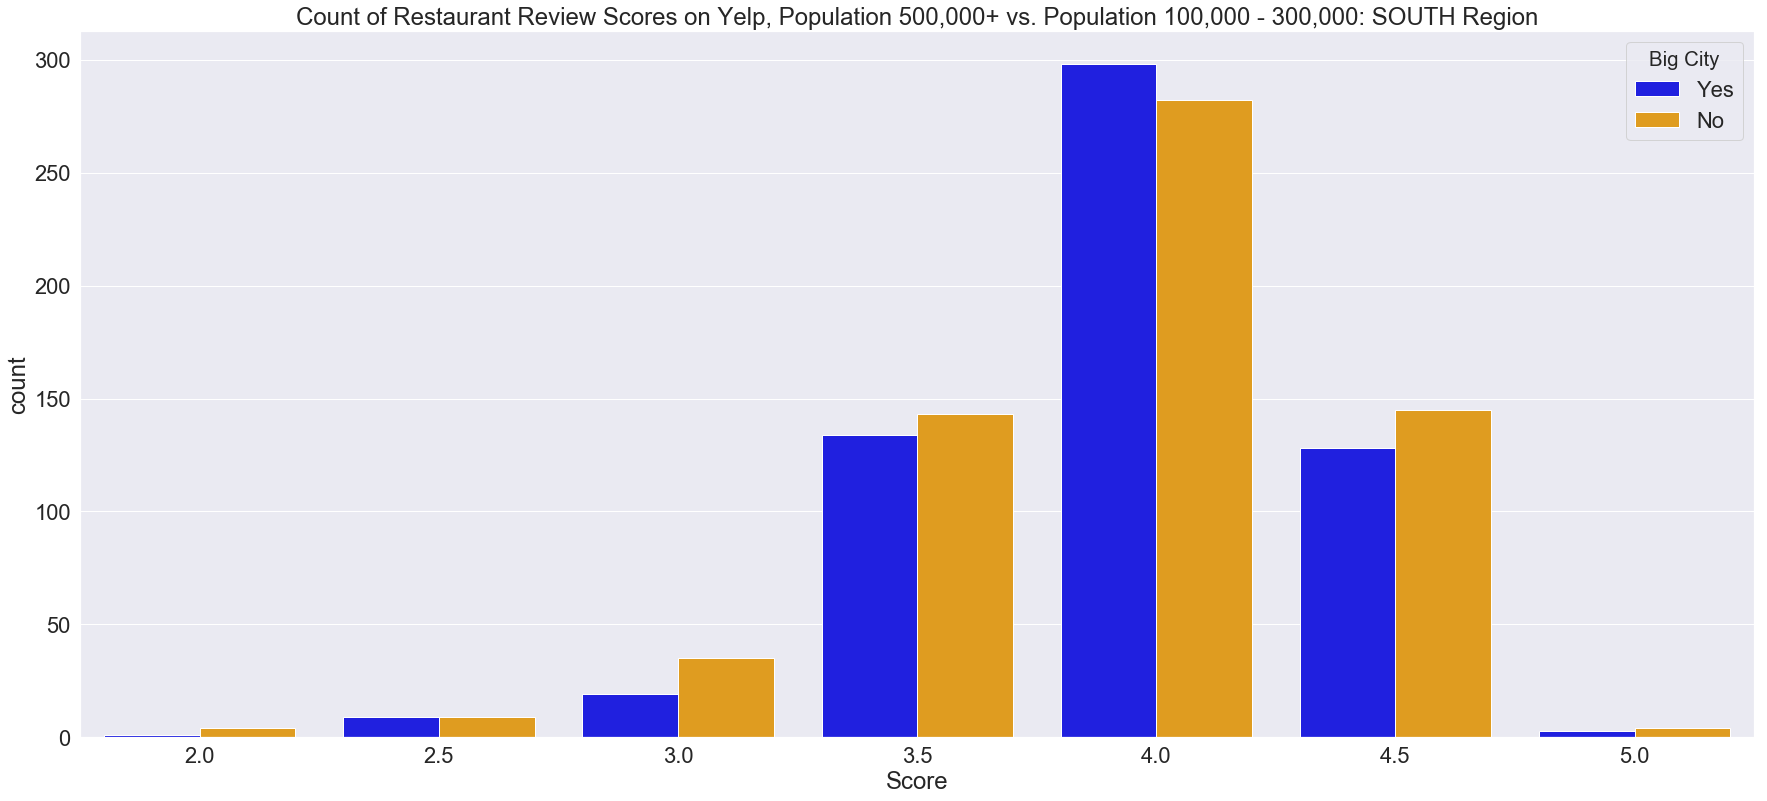

In [146]:
#Slide 19 -- South Graph

plt.figure(figsize=(30,13))
sns.countplot(x="Score", hue="Big City", data=df_comb[df_comb['Region']=='South'], palette=['blue', 'orange']).set_title('Count of Restaurant Review Scores on Yelp, Population 500,000+ vs. Population 100,000 - 300,000: SOUTH Region')

In [110]:
#Slide 19 -- Table Preprocessing

df_comb_east = df_comb[df_comb['Region']=='East']
df_comb_west = df_comb[df_comb['Region']=='West']
df_comb_midwest = df_comb[df_comb['Region']=='Midwest']
df_comb_south = df_comb[df_comb['Region']=='South']

In [111]:
#Slide 19 -- East Table

tab1 = (df_comb_east[df_comb_east['Score']<=3.5].groupby('Big City').count())/(df_comb_east.groupby('Big City').count())
tab1['Score'] = pd.Series([round(val, 4) for val in tab1['Score']], index = tab1.index)
tab1['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab1['Score']], index = tab1.index)
tab1 = tab1.rename(columns={'Score': "3.5 Stars or Less"})

tab2 = (df_comb_east[df_comb_east['Score']==4].groupby('Big City').count())/(df_comb_east.groupby('Big City').count())
tab2['Score'] = pd.Series([round(val, 4) for val in tab2['Score']], index = tab2.index)
tab2['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab2['Score']], index = tab2.index)
tab2 = tab2.rename(columns={'Score': "4.0 Stars Exactly"})

tab3 = (df_comb_east[df_comb_east['Score']>=4.5].groupby('Big City').count())/(df_comb_east.groupby('Big City').count())
tab3['Score'] = pd.Series([round(val, 4) for val in tab3['Score']], index = tab3.index)
tab3['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab3['Score']], index = tab3.index)
tab3 = tab3.rename(columns={'Score': "4.5 Stars or Greater"})

tab1['4.0 Stars Exactly'] = tab2['4.0 Stars Exactly']
tab1['4.5 Stars or Greater'] = tab3['4.5 Stars or Greater']
tab1.drop(columns=['City', 'Region'])

,3.5 Stars or Less,4.0 Stars Exactly,4.5 Stars or Greater
Big City,,,
No,36.95%,41.82%,21.23%
Yes,30.17%,55.34%,14.48%


In [112]:
#Slide 19 -- West Table

tab1 = (df_comb_west[df_comb_west['Score']<=3.5].groupby('Big City').count())/(df_comb_west.groupby('Big City').count())
tab1['Score'] = pd.Series([round(val, 4) for val in tab1['Score']], index = tab1.index)
tab1['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab1['Score']], index = tab1.index)
tab1 = tab1.rename(columns={'Score': "3.5 Stars or Less"})

tab2 = (df_comb_west[df_comb_west['Score']==4].groupby('Big City').count())/(df_comb_west.groupby('Big City').count())
tab2['Score'] = pd.Series([round(val, 4) for val in tab2['Score']], index = tab2.index)
tab2['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab2['Score']], index = tab2.index)
tab2 = tab2.rename(columns={'Score': "4.0 Stars Exactly"})

tab3 = (df_comb_west[df_comb_west['Score']>=4.5].groupby('Big City').count())/(df_comb_west.groupby('Big City').count())
tab3['Score'] = pd.Series([round(val, 4) for val in tab3['Score']], index = tab3.index)
tab3['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab3['Score']], index = tab3.index)
tab3 = tab3.rename(columns={'Score': "4.5 Stars or Greater"})

tab1['4.0 Stars Exactly'] = tab2['4.0 Stars Exactly']
tab1['4.5 Stars or Greater'] = tab3['4.5 Stars or Greater']
tab1.drop(columns=['City', 'Region'])

,3.5 Stars or Less,4.0 Stars Exactly,4.5 Stars or Greater
Big City,,,
No,34.26%,40.49%,25.25%
Yes,21.03%,60.69%,18.28%


In [113]:
#Slide 19 -- Midwest Table

tab1 = (df_comb_midwest[df_comb_midwest['Score']<=3.5].groupby('Big City').count())/(df_comb_midwest.groupby('Big City').count())
tab1['Score'] = pd.Series([round(val, 4) for val in tab1['Score']], index = tab1.index)
tab1['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab1['Score']], index = tab1.index)
tab1 = tab1.rename(columns={'Score': "3.5 Stars or Less"})

tab2 = (df_comb_midwest[df_comb_midwest['Score']==4].groupby('Big City').count())/(df_comb_midwest.groupby('Big City').count())
tab2['Score'] = pd.Series([round(val, 4) for val in tab2['Score']], index = tab2.index)
tab2['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab2['Score']], index = tab2.index)
tab2 = tab2.rename(columns={'Score': "4.0 Stars Exactly"})

tab3 = (df_comb_midwest[df_comb_midwest['Score']>=4.5].groupby('Big City').count())/(df_comb_midwest.groupby('Big City').count())
tab3['Score'] = pd.Series([round(val, 4) for val in tab3['Score']], index = tab3.index)
tab3['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab3['Score']], index = tab3.index)
tab3 = tab3.rename(columns={'Score': "4.5 Stars or Greater"})

tab1['4.0 Stars Exactly'] = tab2['4.0 Stars Exactly']
tab1['4.5 Stars or Greater'] = tab3['4.5 Stars or Greater']
tab1.drop(columns=['City', 'Region'])

,3.5 Stars or Less,4.0 Stars Exactly,4.5 Stars or Greater
Big City,,,
No,36.89%,43.96%,19.15%
Yes,22.67%,54.82%,22.51%


In [114]:
#Slide 19 -- South Table

tab1 = (df_comb_south[df_comb_south['Score']<=3.5].groupby('Big City').count())/(df_comb_south.groupby('Big City').count())
tab1['Score'] = pd.Series([round(val, 4) for val in tab1['Score']], index = tab1.index)
tab1['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab1['Score']], index = tab1.index)
tab1 = tab1.rename(columns={'Score': "3.5 Stars or Less"})

tab2 = (df_comb_south[df_comb_south['Score']==4].groupby('Big City').count())/(df_comb_south.groupby('Big City').count())
tab2['Score'] = pd.Series([round(val, 4) for val in tab2['Score']], index = tab2.index)
tab2['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab2['Score']], index = tab2.index)
tab2 = tab2.rename(columns={'Score': "4.0 Stars Exactly"})

tab3 = (df_comb_south[df_comb_south['Score']>=4.5].groupby('Big City').count())/(df_comb_south.groupby('Big City').count())
tab3['Score'] = pd.Series([round(val, 4) for val in tab3['Score']], index = tab3.index)
tab3['Score'] = pd.Series(["{0:.2f}%".format(val * 100) for val in tab3['Score']], index = tab3.index)
tab3 = tab3.rename(columns={'Score': "4.5 Stars or Greater"})

tab1['4.0 Stars Exactly'] = tab2['4.0 Stars Exactly']
tab1['4.5 Stars or Greater'] = tab3['4.5 Stars or Greater']
tab1.drop(columns=['City', 'Region'])

,3.5 Stars or Less,4.0 Stars Exactly,4.5 Stars or Greater
Big City,,,
No,30.71%,45.34%,23.95%
Yes,27.53%,50.34%,22.13%
